In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [13]:
path = "/Users/adriannapinzariu/Desktop/LIDC_newMode_2022 (1).csv"

In [14]:
df = pd.read_csv(path)

In [15]:
# Drop non-numeric columns
df = df.select_dtypes(include=['float', 'int'])

# Drop rows with NaN values
df = df.dropna()

In [16]:
import umap.umap_ as umap

In [17]:
# Load the data and extract the features and target variable
X_with_id = df
y = (df['Malignancy']).to_numpy()
X = X_with_id.drop(['noduleID', 'Malignancy'], axis = 1)
print(X.columns)

Index(['Subtlety', 'InternalStructure', 'Calcification', 'Sphericity',
       'Margin', 'Lobulation', 'Spiculation', 'Texture', 'InstanceID',
       'RadiologistID',
       ...
       'Correlation', 'Energy', 'Homogeneity', 'Entropy', 'x_3rdordermoment',
       'Inversevariance', 'Sumaverage', 'Variance', 'Clustertendency',
       'MaxProbability'],
      dtype='object', length=115)


In [18]:
# Scale the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [19]:
# Apply UMAP for dimensionality reduction
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)
features = range(pca.n_components_)
explained_variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)

In [20]:
# Calculate cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

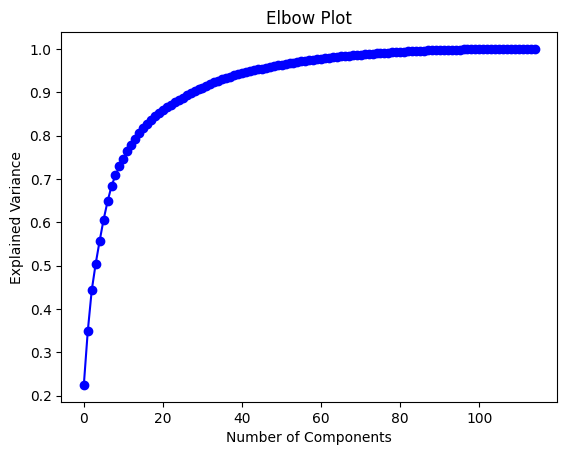

In [21]:
# Plot the explained variance as a function of the number of components
plt.plot(features, cumulative_variances, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Plot')
plt.show()

In [11]:
# Find elbow point
kneedle = KneeLocator(range(1, len(cumulative_var_ratio)+1), cumulative_var_ratio, S=1.0, curve='concave', direction='increasing')
elbow = kneedle.elbow
print(f"Elbow point is at {elbow} principal components")

Elbow point is at 21 principal components
